# Stroke Prediction

## Project done by: Jaitashri Poddar

In report published by World Health Organization (WHO) in 2020, stroke holds second position in the list of <a href="https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death">"The top 10 causes of death"</a>, and it causes approximately 11% of the total deaths. <br> <br>
The model created in this project predicts whether someone is likely to get stroke, based on different input features like gender, age, various physical conditions and few other relevant information about the person.

# Data Definition

**id** unique identifier <br> <br>
**gender** "Male", "Female" or "Other" <br> <br>
**age** age of the patient <br> <br>
**hypertension** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br> <br>
**heart_disease** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br> <br>
**ever_married** "No" or "Yes" <br> <br>
**work_type** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br> <br>
**Residence_type** "Rural" or "Urban" <br> <br>
**avg_glucose_level** average glucose level in blood <br> <br>
**bmi** body mass index <br> <br>
**smoking_status** "formerly smoked", "never smoked", "smokes" or "Unknown"* <br> <br>
"Unknown" in smoking_status means that the information is unavailable for this patient <br> <br>
**stroke** 1 if the patient had a stroke or 0 if not


#### Let us create the model using available data.

# 1. Importing Libraries and Setting Options

## 1.1 Importing Necessay Libraries

In [106]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#import functions to handle imbalanced dataset
from imblearn.combine import SMOTETomek

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# import functions to perform decision tree classification
from sklearn.tree import DecisionTreeClassifier

# import functions to perform random forest classification
from sklearn.ensemble import RandomForestClassifier

# import functions to perform knn classification
from sklearn.neighbors import KNeighborsClassifier

# import pickle to save the model
import pickle

## 1.2 Setting Figure Size

In [107]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## 1.3 Setting Options

In [108]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# 2. Reading Data

In [109]:
#Let's name the dataset as df
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Ongoing_Projects/Stroke_Prediction/healthcare-dataset-stroke-data.csv')

In [110]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [111]:
df.shape

(5110, 12)

#### So our dataset has 5110 rows and 12 columns (features).

# 3. Data Analysis and Preparation

## 3.1 Understanding the Dataset

Let us have a glance on the dataset.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We see that our dataset consists of int64, float64 and object data types.

In [113]:
# 'dtypes' gives the data type for each column
data_type_and_unique = pd.concat([df.dtypes, df.nunique()], axis = 1, keys = ['Data Types', 'Number of unique Values'])
data_type_and_unique

,Data Types,Number of unique Values
id,int64,5110
gender,object,3
age,float64,104
hypertension,int64,2
heart_disease,int64,2
ever_married,object,2
work_type,object,5
Residence_type,object,2
avg_glucose_level,float64,3979
bmi,float64,418


By observing the number of unique values in each feature, it seems that all the features are in correct format.

## 3.2 Data Correction

#### Now let us go through each feature, and make necessary modifications, if needed.

### id

This feature is not necessary in creating our model. Hence we remove it.

In [114]:
df.drop(['id'],axis=1,inplace=True)

### gender

In [115]:
df['gender'].dtype

dtype('O')

In [116]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The feature gender is of object type, and it consist of three arities, namely Female, Male and Other.

### age

In [117]:
df['age'].dtype

dtype('float64')

age is of float64 data type.

### hypertension

In [118]:
df['hypertension'].dtype

dtype('int64')

In [119]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

#### For better understanding, we rename 0 to hype_No (means patiend does not have hypertension), and 1 to hype_Yes (means patient has hypertension)

In [120]:
df['hypertension'] = df['hypertension'].replace(0, 'hype_No')
df['hypertension'] = df['hypertension'].replace(1, 'hype_Yes')

In [121]:
df['hypertension'].dtype

dtype('O')

We see that the data type of the feature hypertension has converted to object.

### heart_disease

In [122]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

#### For better understanding, we rename 0 to hdis_No (means patiend does not have any heart diease), and 1 to hdis_Yes (means patient has heart diease)

In [123]:
df['heart_disease'] = df['heart_disease'].replace(0, 'hdis_No')
df['heart_disease'] = df['heart_disease'].replace(1, 'hdis_Yes')

In [124]:
df['heart_disease'].value_counts()

hdis_No     4834
hdis_Yes     276
Name: heart_disease, dtype: int64

### ever_married

In [125]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

#### For better understanding, we rename 0 to mar_No, and 1 to mar_Yes 

In [126]:
df['ever_married'] = df['ever_married'].replace('No', 'mar_No')
df['ever_married'] = df['ever_married'].replace('Yes', 'mar_Yes')

In [127]:
df['ever_married'].value_counts()

mar_Yes    3353
mar_No     1757
Name: ever_married, dtype: int64

### work_type

In [128]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

The dataset includes patients from various professions such as Private job, Self employed, Goverment job etc.

In [129]:
# Renaming Self-employed to Self_employed
df['work_type'] = df['work_type'].replace('Self-employed','Self_employed')

In [130]:
df['work_type'].value_counts()

Private          2925
Self_employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

### Residence_type

In [131]:
df['Residence_type'].dtype

dtype('O')

In [132]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

### avg_glucose_level

In [133]:
df['avg_glucose_level'].dtype

dtype('float64')

### bmi

In [134]:
df['bmi'].dtype

dtype('float64')

### smoking_status

In [135]:
df['smoking_status'].dtype

dtype('O')

In [136]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [137]:
df['smoking_status'] = df['smoking_status'].replace('never smoked', 'Never_Smoked')
df['smoking_status'] = df['smoking_status'].replace('formerly smoked', 'Formerly_Smoked')

In [138]:
df['smoking_status'].value_counts()

Never_Smoked       1892
Unknown            1544
Formerly_Smoked     885
smokes              789
Name: smoking_status, dtype: int64

The database consists of patients who never smoked, or formerly smoked, currently smokes, or  for whom the status is unknown.

## 3.3 Summary Statistics

### 3.3.1 Summary Statistics of Numerical Variables

In [139]:
df.describe()

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.
<br><br>
    Let us consider the 'age' variable to see the statistics- <br>
The age varable ranges from almost 0 (means newborn) years to 82 years, with mean around 43 years. 25% of total atients are under age 25, 50% are under 45, and 75% are under 61. <br>

The variable bmi has count less than total number of observations which indicates the presence of missing values. We deal with the missing data in upcoming sections.

### 3.3.2 Summary Statistics of Categoric Variables

In [140]:
df.describe(include=object)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4
top,Female,hype_No,hdis_No,mar_Yes,Private,Urban,Never_Smoked
freq,2994,4612,4834,3353,2925,2596,1892


The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frquency.:

We will understand the outputs of the above table using variable 'work_type' 
count: Number of observations i.e., 5110 
unique: Number of unique values or classes in the variable. i.e., it has 5 classes in it.

top: The most occurring class, in this variable it is Private (patients doing private jobs) 
frequency: Frequency of the most repeated class; out of 5110 observations private jobs has a frequency of 2925 

## 3.4 Splitting Numerical and Categoric Features

### 3.4.1 Filtering Numerical Variables

In [141]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

df_numeric_features.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke'], dtype='object')

### 3.4.2 Filtering Categoric Variables

In [142]:
# filter the categoric features in the dataset using select_dtypes()
# include=object: selects the caegoric features

df_categorical_features = df.select_dtypes(include = object)

df_categorical_features.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status'],
      dtype='object')

## 3.5 Univariate Analysis

Let us visualize the distribution of all the features.

### 3.5.1 Univariate Analysis of Numerical Features 

We perform the univariate analysis of the numerical features using histogram.

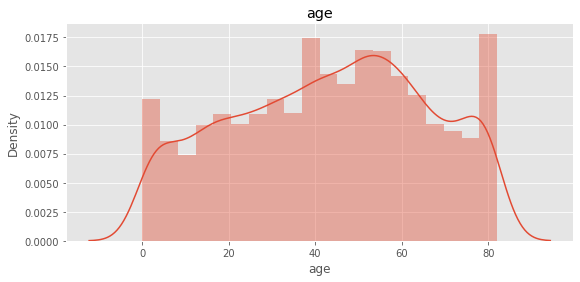

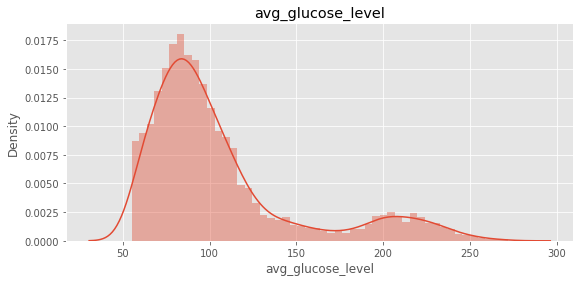

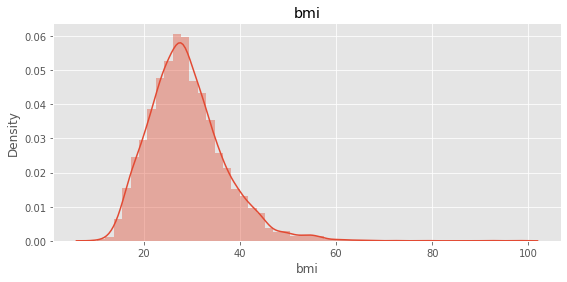

In [143]:
plt.style.use('ggplot')
for column in df_numeric_features[['age','avg_glucose_level','bmi']]:
    #Considering only the independent numerical variables
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title(column)

### 3.5.2 Univariate Analysis of Categorical Features

We perform the univariate analysis of the numerical features using count plot.

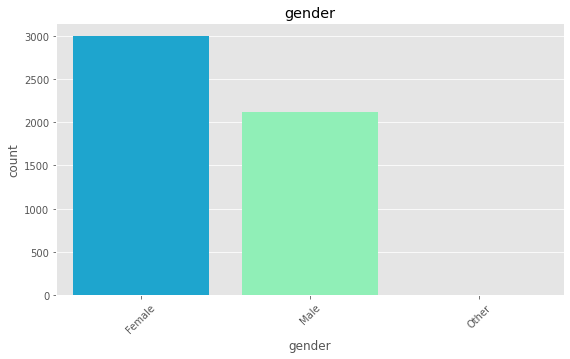

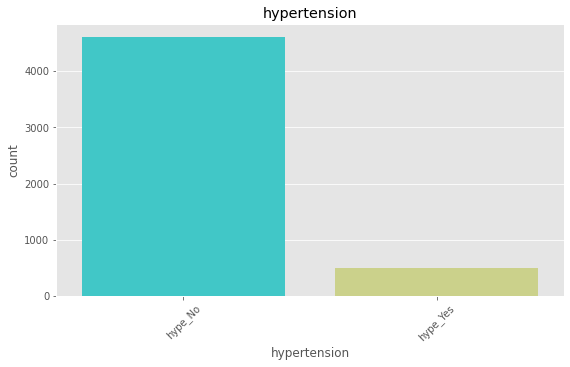

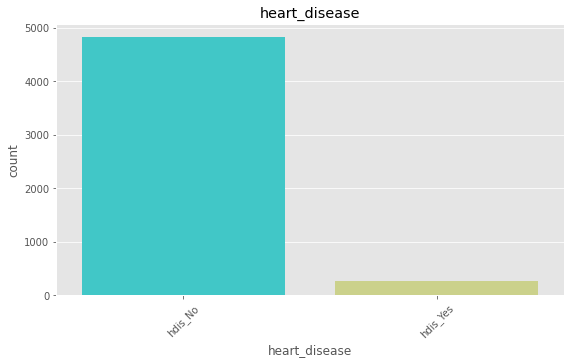

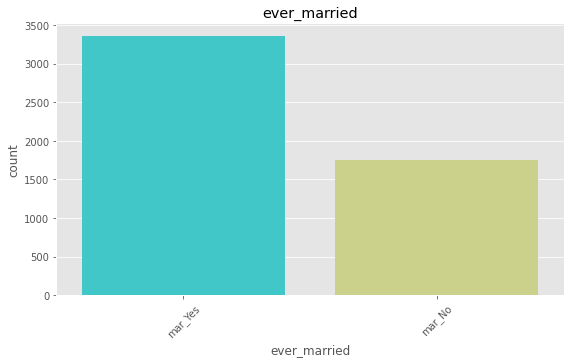

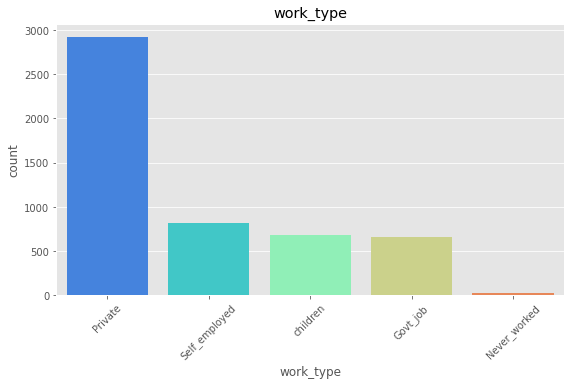

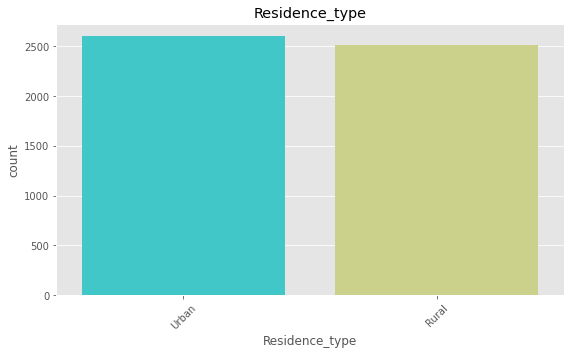

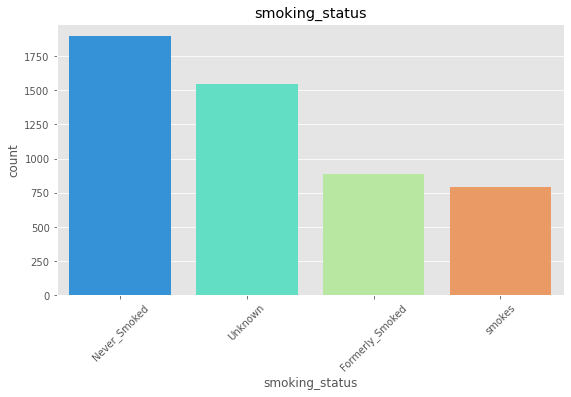

In [144]:
for column in df_categorical_features:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.countplot(x = column, data = df, order = df[column].value_counts().index, palette='rainbow')
  plt.xticks(rotation=45)
  plt.title(column)

From the univariate analysis of categorical features, we can conclude the following features about different variables: <br>

**gender** : Most of the patients are Female, followed by Male. <br>
**hypertension** : Most of the patients don't have hypertension. <br>
**heart_disease** : Most of the patients don't have heart disease. <br>
**ever_married** : Most of the patients are either married or have been married at some point of their lives. <br>
**work_type** : Most of the patients do Private jobs, followed by self employed people. <br>
**residence_type** : The number of patients belonging to urban and rural area are almost same. <br>
**smoking_status** : Most of the patients have never smoked.

## 3.6 Bivariate Analysis

### 3.6.1 Bivariate Analysis between Numerical Variables and Target Variable 

We perform the analysis using box plot between numeric variables and target variable.

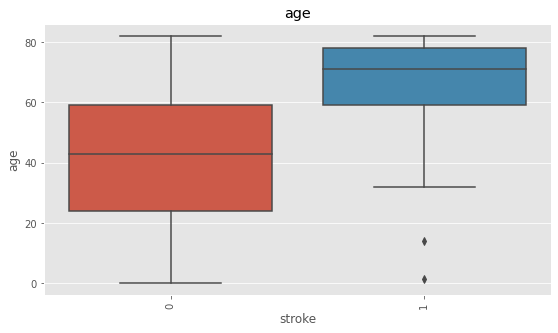

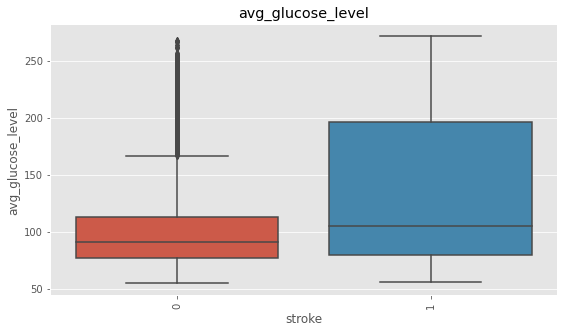

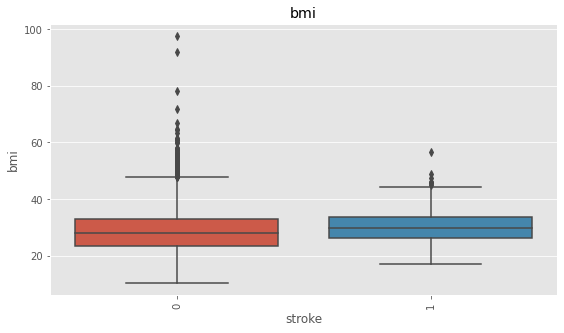

In [145]:
for column in df_numeric_features[['age','avg_glucose_level','bmi']]:
  #Considering only the independent numerical variables
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  #sns.boxplot(x=df[column],hue=df['stroke'],data=df)
  sns.boxplot(data=df, x=df['stroke'], y=df[column])
  plt.title(column)
  plt.xticks(rotation=90)

From the bivariate analysis between numeric features and target variable , we can conclude the following features about different variables: <br>

**age** : People more prone to have stroke have higher average age. <br>
**avg_glucose_level** : People more prone to have stroke have higher average glucose level. <br>
**bmi** : People more prone to have stroke have slightly higher bmi.


### 3.6.2 Bivariate Analysis between Categoric Variables and Target Variable

We perform the analysis using count plot between caegoric variables and target variable.

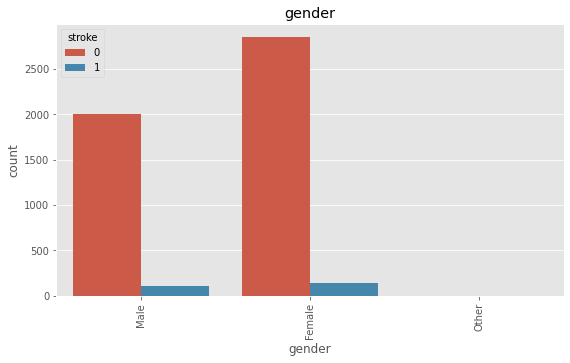

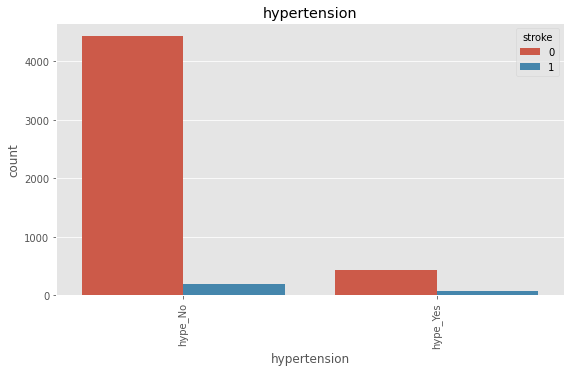

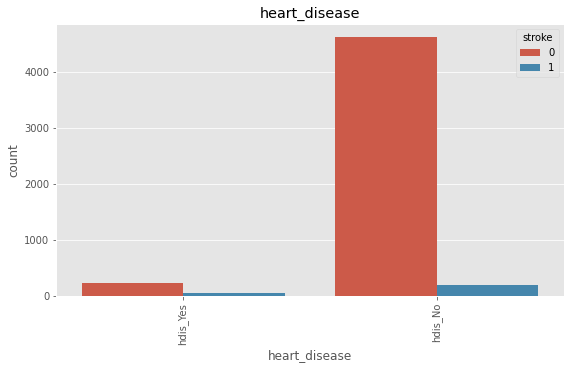

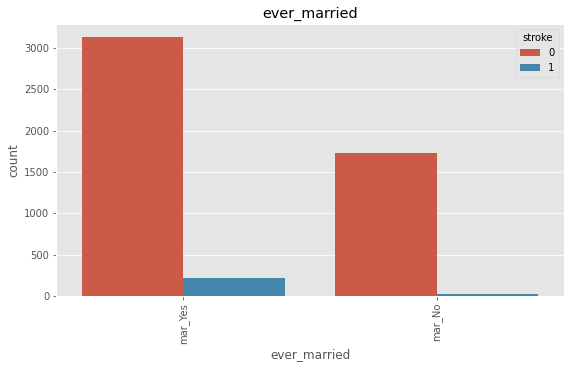

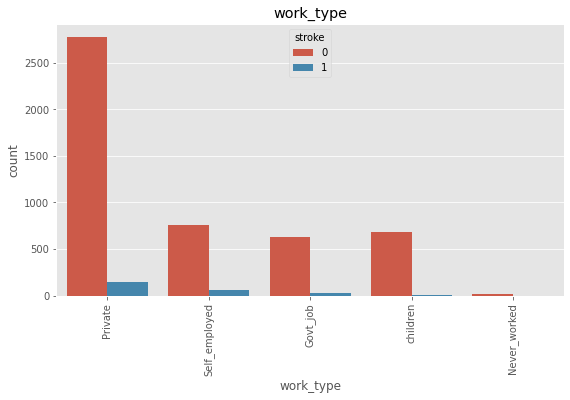

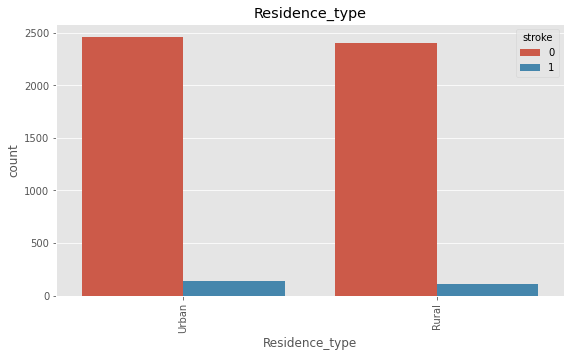

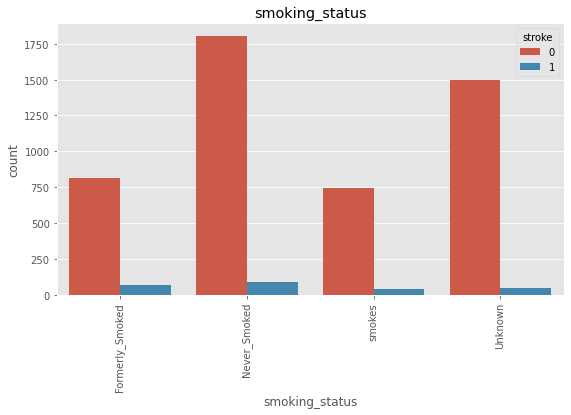

In [146]:
for column in df_categorical_features:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.countplot(x=df[column],hue=df['stroke'],data=df)
  plt.title(column)
  plt.xticks(rotation=90)

From the bivariate analysis between categorical features and target feature, we can conclude the following features about different variables: <br>

**gender** : Most of the patients having stroke are Female, followed by Male. <br>
**work_type** : Most of the patients facing stroke do Private jobs, followed by self employed people. <br>
However, it can be seen from the analysis that the dataset mostly consists of patients not having stroke.

### 3.6.3 Pair Plot between Continuous Variables

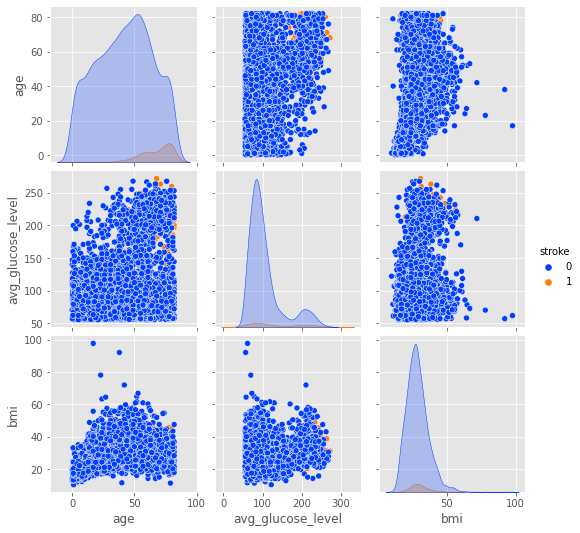

In [147]:
y = df_numeric_features.stroke
X = df_numeric_features.drop('stroke', axis=1)
sns.pairplot(df_numeric_features, hue="stroke",palette="bright")

## 3.7 Handling Missing Values

### 3.7.1 Checking Missing Values

In [148]:
# Generating list of missing values feature wise
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first

Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
bmi,201,3.933464,float64
stroke,0,0.000000,int64
smoking_status,0,0.000000,object
avg_glucose_level,0,0.000000,float64
Residence_type,0,0.000000,object
work_type,0,0.000000,object
ever_married,0,0.000000,object
heart_disease,0,0.000000,object
hypertension,0,0.000000,object
age,0,0.000000,float64


### 3.7.2 Checking Missing Values using Heat Map

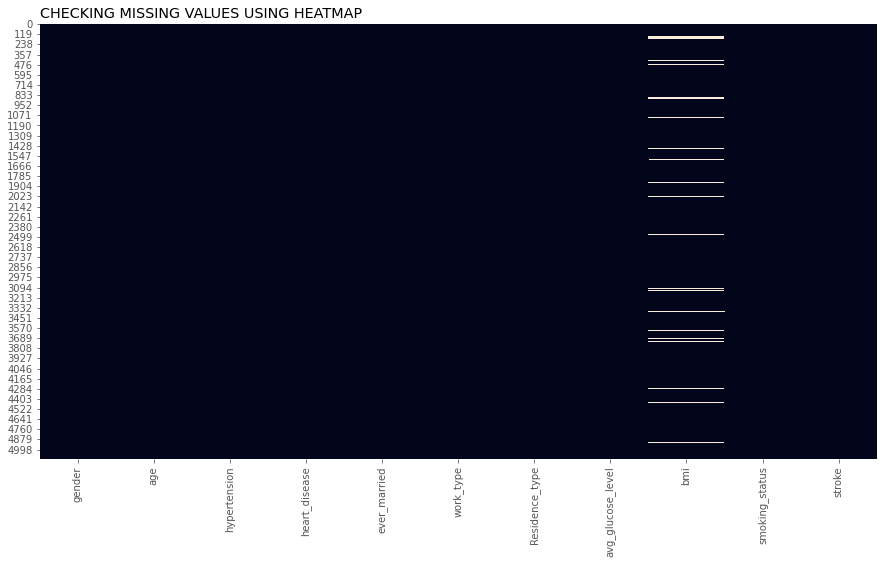

In [149]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# Title for heatmap
title = 'Checking Missing Values Using Heatmap'.upper()
plt.title(title, loc='left')

# display the plot
plt.show()

So we see the feature bmi consists of 201 missing values, which is around 3.93% of total missing values. 

In [150]:
df['bmi'].skew()

1.0553402052962912

We see the variable bmi is positvely skewed. Hence we replace the missing values with median.

In [151]:
df['bmi'].median()

28.1

In [152]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

### 3.7.3 Checking Missing Values after Handling

In [153]:
# Generating list of missing values feature wise
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first

Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
stroke,0,0.0,int64
smoking_status,0,0.0,object
bmi,0,0.0,float64
avg_glucose_level,0,0.0,float64
Residence_type,0,0.0,object
work_type,0,0.0,object
ever_married,0,0.0,object
heart_disease,0,0.0,object
hypertension,0,0.0,object
age,0,0.0,float64


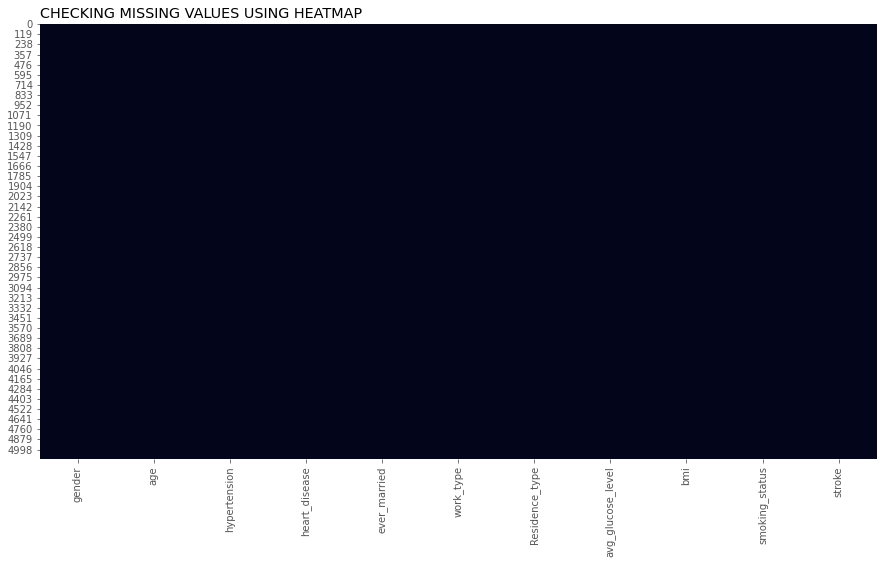

In [154]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# Title for heatmap
title = 'Checking Missing Values Using Heatmap'.upper()
plt.title(title, loc='left')

# display the plot
plt.show()

#### So we see there are no more missing values in the dataset.

## 3.8 Data Preparation

Now we prepare our dataset so that we can create different models.

### 3.8.1 Dummy Encoding of Categoric Variales

In [155]:
df_numeric_features = df.select_dtypes(include=np.number)
df_categorical_features = df.select_dtypes(include=object)

In [156]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categorical_features, drop_first = True)

### 3.8.2 Concatenating Numeric and Dummy Encoded Categoric Variables

In [157]:
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

In [158]:
df_dummy.columns

Index(['age', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male',
       'gender_Other', 'hypertension_hype_Yes', 'heart_disease_hdis_Yes',
       'ever_married_mar_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self_employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_Never_Smoked', 'smoking_status_Unknown',
       'smoking_status_smokes'],
      dtype='object')

### 3.8.3 Extracting Predictor and Target Variables 

In [159]:
#EXTRACT THE PREDICTOR VARIABLES
X = df_dummy.iloc[:, df_dummy.columns != 'stroke']
#y is the Target Variable
print("The Predictor Variables are:\n",X.columns)

#EXTRACT THE TARGET VARIABLE
y = df_dummy.iloc[:, df_dummy.columns == 'stroke']
#y is the Target Variable
print("The Target Variable is:\n",y.columns)

The Predictor Variables are:
 Index(['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other',
       'hypertension_hype_Yes', 'heart_disease_hdis_Yes',
       'ever_married_mar_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self_employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_Never_Smoked', 'smoking_status_Unknown',
       'smoking_status_smokes'],
      dtype='object')
The Target Variable is:
 Index(['stroke'], dtype='object')


### 3.8.4 Splitting Train and Test Data

In [160]:
#SPLIT DATA INTO TRAIN AND TEST SUBSET FOR PREDICTOR AND TARGET VARIABLES
# Importing library to split the data into train and test
from sklearn.model_selection import train_test_split

# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)      

The shape of X_train is: (4088, 16)
The shape of X_test is: (1022, 16)
The shape of y_train is: (4088, 1)
The shape of y_test is: (1022, 1)


### 3.8.5 Checking distribution of Target Variable in train dataset

In [161]:
y_train['stroke'].value_counts()

0    3899
1     189
Name: stroke, dtype: int64

We see that the distribution of classes in train dataset is highly imbalanced. In order to balance the dataset, we apply SMOTETomek technique.

In [162]:
from imblearn.combine import SMOTETomek

In [163]:
smote_tomek = SMOTETomek(random_state=42)
X_train_st, y_train_st = smote_tomek.fit_sample(X_train, y_train)

In [164]:
#Converting balanced data to dataframe
X_train_st = pd.DataFrame(X_train_st)
y_train_st = pd.DataFrame(y_train_st)
X_train_st.shape, y_train_st.shape

((7726, 16), (7726, 1))

In [165]:
y_train_st.value_counts()

1    3863
0    3863
dtype: int64

So we see the train dataset is now balanced.

## 3.9 Defining Generalized Functions for Measuring Performance Measures

### 3.9.1 Creating Generalized Function to Calculate Metrices for Test Set

In [166]:
#Create a generalized function to calculate the METRICS for the test set.

from sklearn.metrics import classification_report
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

### 3.9.2 Creating generalized function to calculate Kappa Score for test set

In [167]:
#Create a generalized function to calculate the KAPPA SCORE for the test set.

from sklearn.metrics import cohen_kappa_score
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

### 3.9.3 Creating generalized function to plot Confusion Matrix

In [168]:
#Define a function to plot the CONFUSION MATRIX.
from sklearn.metrics import confusion_matrix
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

### 3.9.4 Creating generalized function to plot ROC Curve

In [169]:
#Define a function to plot the ROC CURVE.

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

### 3.9.5 Creating generalized function to tabulate performance metrices

In [170]:
# Create a generalized function to create a dataframe containing the scores for the models.
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
from sklearn import metrics
def update_score_card(model_name, model_caption):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_caption,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

**As our dataset and other prerequisites are now prepared, we can proceed towards model building.**

# 4. Building Models

## 4.1 Decision Tree Classifier

In [171]:
#Building the model
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
#Fitting training data
decision_tree_model.fit(X_train_st, y_train_st)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [172]:
#Predicting test data
y_pred = decision_tree_model.predict(X_test)
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [173]:
#Checking the score
decision_tree_model.score(X_train_st, y_train_st)

1.0

In [174]:
#Printing model metrices
print(get_test_report(decision_tree_model))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       962
           1       0.16      0.17      0.16        60

    accuracy                           0.90      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.90      0.90      0.90      1022



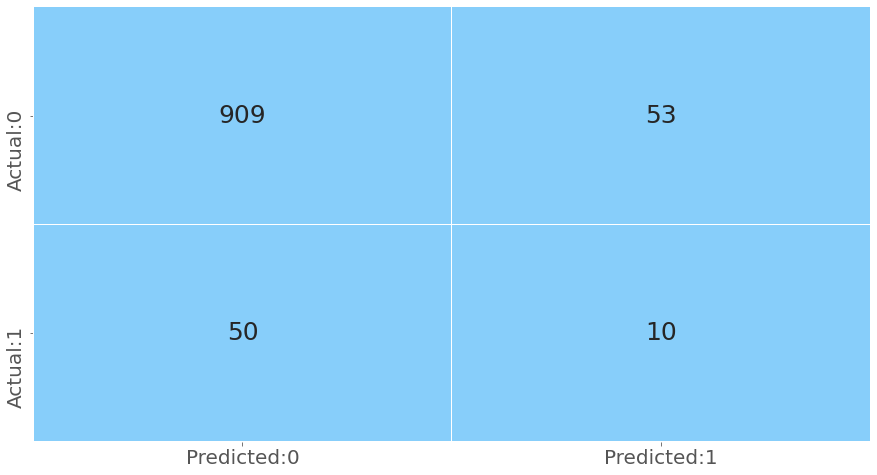

In [175]:
# Plotting Confusion Matrix
plot_confusion_matrix(decision_tree_model)

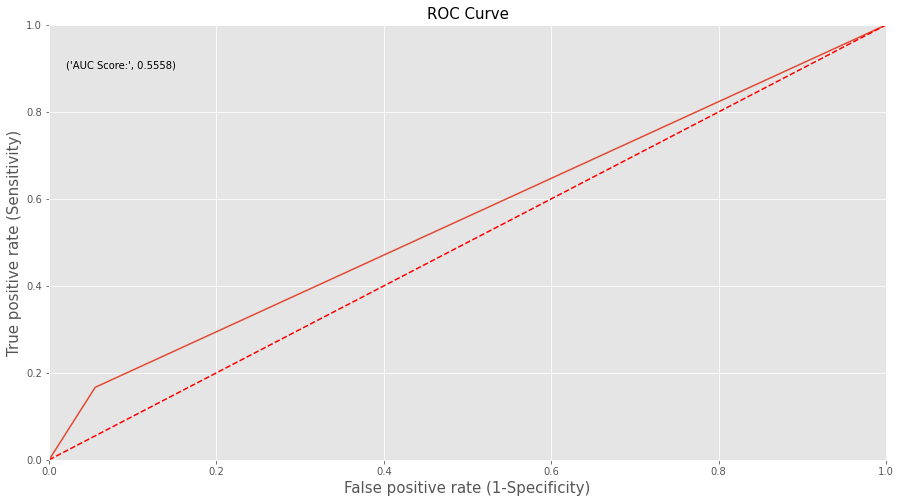

In [176]:
# Plotting ROC Curve
plot_roc(decision_tree_model)

In [177]:
# Printing Kappa Score
kappa_score(decision_tree_model)

0.10901765612039338

In [178]:
# Tabulating the results
update_score_card(decision_tree_model, 'Decesion Tree Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decesion Tree Classifier,0.555787,0.15873,0.166667,0.899217,0.109018,0.162602


## 4.2 Random Forest Classifier

In [179]:
# Building the Model

rfc_model = RandomForestClassifier(max_depth=15, random_state=0)

In [180]:
#Fitting the data
rfc_model.fit(X_train_st, y_train_st)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [181]:
#Predicting test data
y_pred = rfc_model.predict(X_test)
y_pred_prob = rfc_model.predict_proba(X_test)[:,1]

In [182]:
#Printing model metrices
print(get_test_report(rfc_model))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       962
           1       0.10      0.02      0.03        60

    accuracy                           0.93      1022
   macro avg       0.52      0.50      0.50      1022
weighted avg       0.89      0.93      0.91      1022



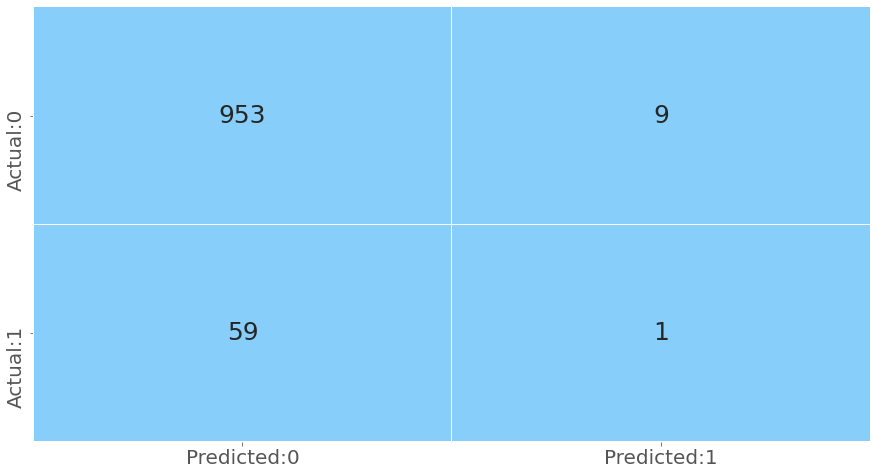

In [183]:
# Plotting Confusion Matrix
plot_confusion_matrix(rfc_model)


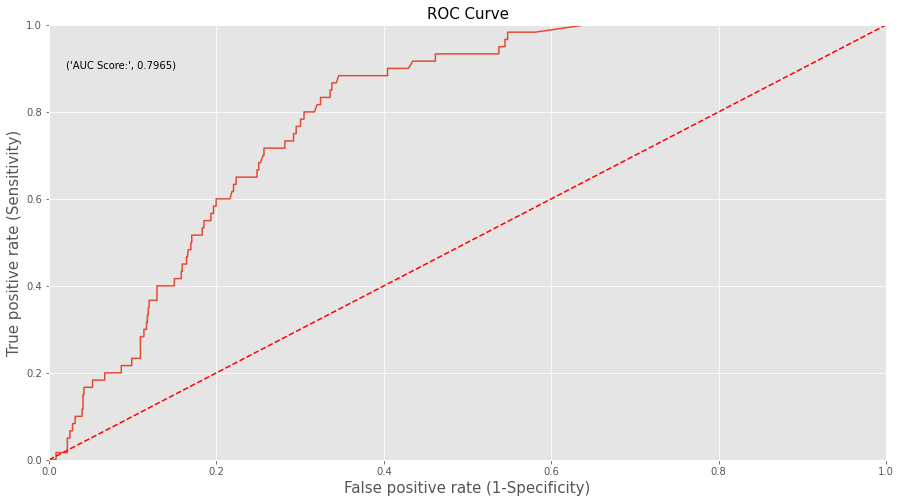

In [184]:
# Plotting ROC Curve
plot_roc(rfc_model)

In [185]:
# Printing Kappa Score
kappa_score(rfc_model)


0.011998862667045862

In [186]:
# Tabulating the results
update_score_card(rfc_model, 'Random Forest Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decesion Tree Classifier,0.555787,0.15873,0.166667,0.899217,0.109018,0.162602
1,Random Forest Classifier,0.796483,0.10000,0.016667,0.933464,0.011999,0.028571


## 4.3 KNN Classifier

In [187]:
#Building the model
knn = KNeighborsClassifier(n_neighbors=3)
#Fitting training data
knn.fit(X_train_st, y_train_st)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [188]:
#Predicting test data
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [189]:
#Checking the score
knn.score(X_train_st, y_train_st)

0.9426611441884546

In [190]:
#Printing model metrices
print(get_test_report(knn))


              precision    recall  f1-score   support

           0       0.96      0.82      0.88       962
           1       0.14      0.48      0.22        60

    accuracy                           0.80      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.91      0.80      0.84      1022



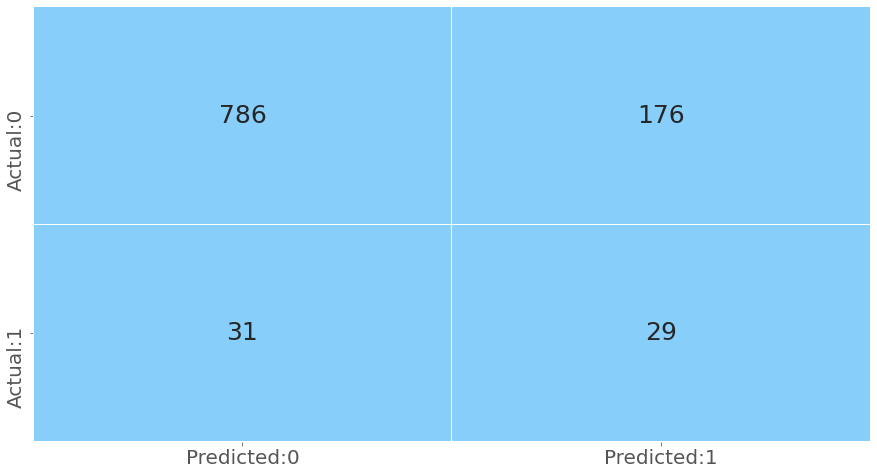

In [191]:
# Plotting Confusion Matrix
plot_confusion_matrix(knn)

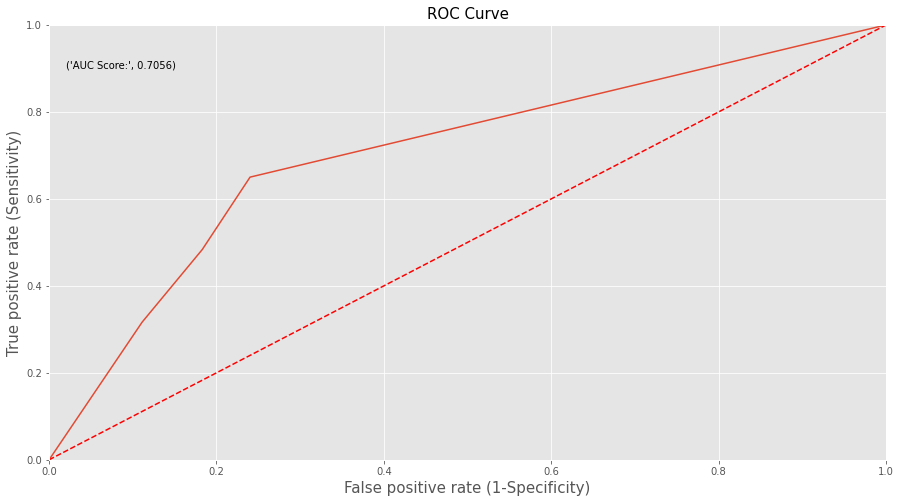

In [192]:
# Plotting ROC Curve
plot_roc(knn)

In [193]:
# Printing Kappa Score
kappa_score(knn)

0.14082768143605573

In [194]:
# Tabulating the results
update_score_card(knn, 'KNN Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decesion Tree Classifier,0.555787,0.158730,0.166667,0.899217,0.109018,0.162602
1,Random Forest Classifier,0.796483,0.100000,0.016667,0.933464,0.011999,0.028571
2,KNN Classifier,0.705596,0.141463,0.483333,0.797456,0.140828,0.218868


## 4.4 KNN with GridSearchCV

In [195]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 30, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train_st, y_train_st)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [196]:
knn_GS = KNeighborsClassifier(n_neighbors=1,metric='manhattan')

In [197]:
knn_GS.fit(X_train_st, y_train_st)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [198]:
knn_GS.score(X_train_st, y_train_st)

1.0

In [199]:
#Predicting test data
y_pred = knn_GS.predict(X_test)
y_pred_prob = knn_GS.predict_proba(X_test)[:,1]

In [200]:
#Printing model metrices
print(get_test_report(knn_GS))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       962
           1       0.15      0.28      0.19        60

    accuracy                           0.86      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.91      0.86      0.88      1022



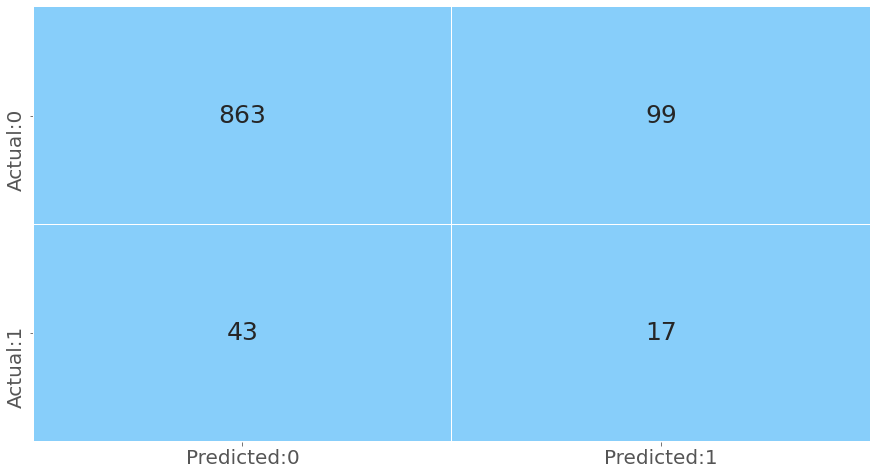

In [201]:
# Plotting Confusion Matrix
plot_confusion_matrix(knn_GS)

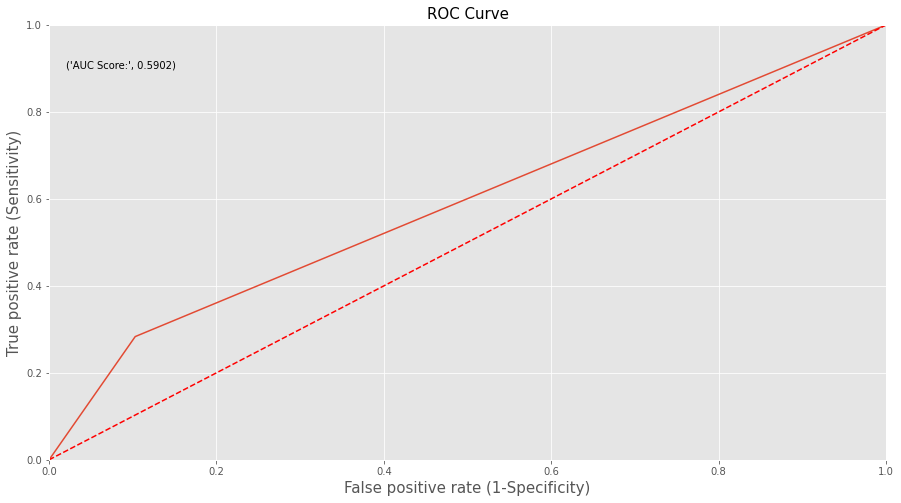

In [202]:
# Plotting ROC Curve
plot_roc(knn_GS)

In [203]:
# Printing Kappa Score
kappa_score(knn_GS)

0.12550617045892787

In [204]:
# Tabulating the results
update_score_card(knn_GS, 'KNN Classifier with GridSearchCV')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decesion Tree Classifier,0.555787,0.158730,0.166667,0.899217,0.109018,0.162602
1,Random Forest Classifier,0.796483,0.100000,0.016667,0.933464,0.011999,0.028571
2,KNN Classifier,0.705596,0.141463,0.483333,0.797456,0.140828,0.218868
3,KNN Classifier with GridSearchCV,0.590211,0.146552,0.283333,0.861057,0.125506,0.193182


# 5. Saving Model for Reuse

***After observing the comparison table, we see that we can achive best performance using KNN Classifier model with default values of different hyperparameters. Hence we dump this model for further use.***

In [205]:
# Save to file in the current working directory
pkl_filename = "stroke_prediction_knn.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(knn, file)

# 6. Conclusion

In [206]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decesion Tree Classifier,0.555787,0.158730,0.166667,0.899217,0.109018,0.162602
1,Random Forest Classifier,0.796483,0.100000,0.016667,0.933464,0.011999,0.028571
2,KNN Classifier,0.705596,0.141463,0.483333,0.797456,0.140828,0.218868
3,KNN Classifier with GridSearchCV,0.590211,0.146552,0.283333,0.861057,0.125506,0.193182


**Let us visualize the comparison between different performance metrices of different models.**

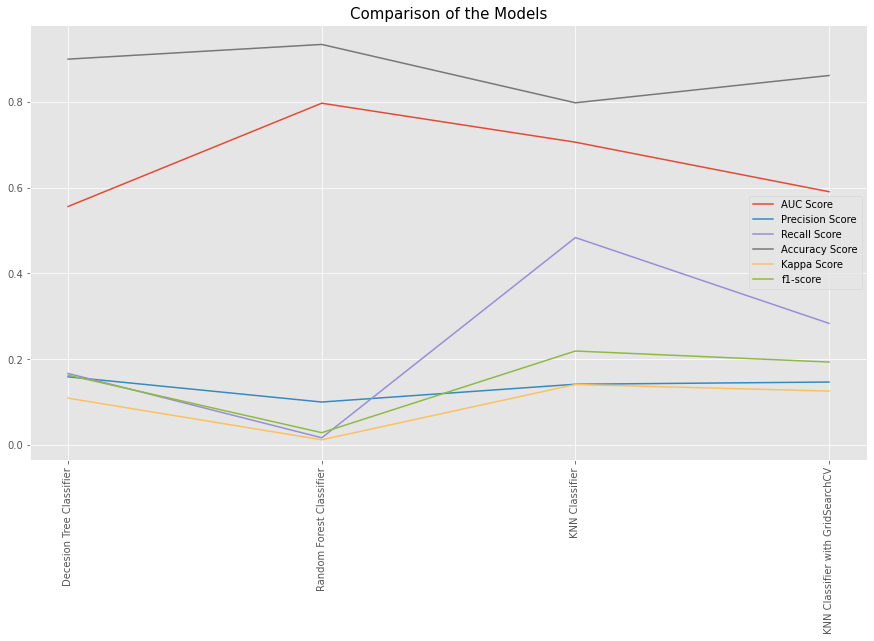

In [207]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1,2,3], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()

So, we can conclude that, overall satisfactory performance is provided by KNN Classifier with default values of hyperparameters. Hence this model has been saved for further use, and the same model has been used for deployment.